# 1. Data Loading and Cleaning

## Imports

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

## Loading Data

In [295]:
positions = pd.read_csv('../data/vessel_positions.csv')
characteristics = pd.read_csv('../data/vessel_characteristics.csv')

/var/folders/_h/908hqbz56jj3y35px7511bzr0000gn/T/ipykernel_90375/1822538655.py:1: DtypeWarning: Columns (20,21,25,26,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv('../data/vessel_positions.csv')
/var/folders/_h/908hqbz56jj3y35px7511bzr0000gn/T/ipykernel_90375/1822538655.py:2: DtypeWarning: Columns (42,47,72,81,154,163,210) have mixed types. Specify dtype option on import or set low_memory=False.
  characteristics = pd.read_csv('../data/vessel_characteristics.csv')


In [296]:
# View shape and preview

print("Positions:", positions.shape)
print("Characteristics:", characteristics.shape)

Positions: (71635, 54)
Characteristics: (14757, 212)


In [297]:
positions.head()

,index,imo,vessel_dwt,status_date_time,in_blackout,ais_speed,ais_draft,vessel_speed_ratio,ais_lat,ais_long,...,real_destination_country_name,real_destination_zone_id,real_destination_zone_name,vessel_operational_status,vessel_commodity_onboard,vessel_commodity_group_onboard,voyage_intake_mt,last_seen,during_cabotage_voyage,vessel_operational_status_group
0,0,1014149,11717,20/08/2024,0,0.0,5.1,NaN,34.3504,133.877,...,Japan,73.0,Far East,waiting_load,NaN,NaN,NaN,19/08/2024 23:56,1,at_port_waiting_load_group
1,1,1014163,39815,20/08/2024,0,0.0,6.1,NaN,-33.8022,137.052,...,China,73.0,Far East,at_port_load,Grain,Grain,27320.0,19/08/2024 23:56,0,in_port_loading_group
2,2,1014199,11722,20/08/2024,0,0.0,4.4,NaN,34.4042,133.425,...,Japan,73.0,Far East,waiting_load,NaN,NaN,NaN,19/08/2024 23:59,1,at_port_waiting_load_group
3,3,1014254,13465,20/08/2024,0,11.8,9.5,NaN,11.7398,109.489,...,Japan,73.0,Far East,at_sea_laden,Steels,Steels,12353.0,19/08/2024 23:59,1,at_sea_laden_group
4,4,1014591,39415,20/08/2024,0,11.0,10.6,NaN,16.4267,113.858,...,NaN,NaN,NaN,at_sea_laden,Steels,Steels,36350.0,19/08/2024 23:52,0,at_sea_laden_group


In [298]:
characteristics.head()

,id,imo,axs_notes_dry,name,type,subtype,ship_status,registered_owner,ship_owner,tc_operator,...,cranes_number,cranes_swl,cranes_outreach,cranes_position,hold_details,hatches_details,private_comments,private_tags,conversion_date,private_notes
0,83576,9122590,NaN,BERGE FUJI,Bulk carrier,Ore Carrier,DELIVERED,BERGE MAUNA KEA CO SA,BERGE BULK,BERGE BULK,...,0,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,94194,9237230,NaN,XH VOYAGER,Bulk carrier,Ore Carrier,DELIVERED,FOND MARINE PTE LTD,ZHOUSHAN XIEHAI SHIPPING,ZHOUSHAN XIEHAI SHIPPING,...,0,0.0,0,NaN,No. 1 : - cbm;No. 2 : - cbm;No. 3 : - cbm;No. ...,No. 1 : - m X - m;No. 2 : - m X - m;No. 3 : - ...,0,NaN,NaN,NaN
2,97323,9270567,NaN,CAPE TOUCAN,Bulk carrier,Ore Carrier,DELIVERED,POLGRYN SHIPPING INC,ZODIAC MARITIME,ZODIAC MARITIME,...,0,0.0,0,NaN,No. 1 : - cbm;No. 2 : - cbm;No. 3 : - cbm;No. ...,No. 1 : 16.91 m X 16 m;No. 2 : 16.91 m X 16 m;...,0,NaN,NaN,NaN
3,98092,9279393,NaN,WINNING EXCELLENCE,Bulk carrier,Ore Carrier,DELIVERED,WINNING EXCELLENCE SHIPPING PTE LTD,WINNING SHIPPING HK,WINNING SHIPPING HK,...,0,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
4,102164,9321275,NaN,BRASIL MARU,Bulk carrier,Ore Carrier,DELIVERED,MOL,MOL,MOL,...,0,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN


In [299]:
positions.columns

Index(['index', 'imo', 'vessel_dwt', 'status_date_time', 'in_blackout',
       'ais_speed', 'ais_draft', 'vessel_speed_ratio', 'ais_lat', 'ais_long',
       'vessel_draft_status', 'zone_id', 'zone_name', 'zone_entry_time',
       'zone_out_time', 'updated_at', 'country_id', 'country_name', 'port_id',
       'port_name', 'port_entry_time', 'port_out_time',
       'operation_location_id', 'operation_location_name',
       'operation_location_type', 'operation_location_entry_time',
       'operation_location_out_time', 'waiting_zone_id', 'waiting_zone_name',
       'waiting_zone_entry_time', 'waiting_zone_out_time', 'ais_heading',
       'ais_eta', 'ais_destination_raw', 'ais_destination_normalized',
       'origin_port_id', 'origin_port_name', 'origin_country_id',
       'origin_country_name', 'origin_zone_id', 'origin_zone_name',
       'real_destination_port_id', 'real_destination_port_name',
       'real_destination_country_id', 'real_destination_country_name',
       'real_destinatio

## Feature Inspection and Observation of Erroneous Data Points 


### Positions

In [300]:
for c in positions.columns:
    print(positions[c].value_counts())

index
0        1
47755    1
47761    1
47760    1
47759    1
        ..
23883    1
23884    1
23885    1
23886    1
71634    1
Name: count, Length: 71635, dtype: int64
imo
1014149    5
9287194    5
9286906    5
9286918    5
9286920    5
          ..
8811390    4
9953705    3
9966831    1
9885300    1
9986910    1
Name: count, Length: 14330, dtype: int64
vessel_dwt
58018     185
63301      90
57809      85
76596      85
324690     65
         ... 
15          1
13417       1
93          1
142         1
82781       1
Name: count, Length: 10524, dtype: int64
status_date_time
24/08/2024    14329
22/08/2024    14327
23/08/2024    14327
20/08/2024    14326
21/08/2024    14326
Name: count, dtype: int64
in_blackout
0    68990
1     2645
Name: count, dtype: int64
ais_speed
0.0     23158
0.1      5351
11.0     3336
12.0     2522
10.0     2518
        ...  
20.8        1
49.4        1
39.5        1
37.3        1
55.7        1
Name: count, Length: 289, dtype: int64
ais_draft
6.5     1591
7.0     1

#### From the above inspection, we can see errenous entries in port_entry_time, operation_location_entry_time, operation_location_out_time, waiting_zone_entry_time, waiting_zone_out_time, ex formats:
float: 45524.9442 <br>
datetime: 01/08/2024 10:45 

### Characteristics

In [301]:
characteristics.columns.tolist()

['id',
 'imo',
 'axs_notes_dry',
 'name',
 'type',
 'subtype',
 'ship_status',
 'registered_owner',
 'ship_owner',
 'tc_operator',
 'beneficial_owner',
 'flag',
 'built',
 'demolition_date',
 'dwt',
 'summer_fresh_water_dwt',
 'winter_salt_water_dwt',
 'tropical_salt_water_dwt',
 'tropical_fresh_water_dwt',
 'lbp',
 'loa',
 'beam',
 'draft',
 'winter_salt_water_draft',
 'tropical_salt_water_draft',
 'summer_fresh_water_draft',
 'tropical_fresh_water_draft',
 'depth',
 'tpc',
 'winter_salt_water_tpc',
 'tropical_salt_water_tpc',
 'summer_fresh_water_tpc',
 'tropical_fresh_water_tpc',
 'air_draft',
 'gt',
 'suez_gt',
 'panama_gt',
 'nt',
 'suez_nt',
 'panama_nt',
 'ldt',
 'shipyard',
 'second_shipyard',
 'hull_number',
 'design',
 'total_main_engines',
 'bow_thruster',
 'stern_thruster',
 'geared',
 'grabs_number',
 'grabs_capacity',
 'total_decks',
 'grain',
 'bale',
 'holds',
 'hatches',
 'active',
 'call_sign',
 'open_hatches',
 'lakes_fitted',
 'logs_fitted',
 'ahl_fitted',
 'co2_fit

In [302]:
for c in characteristics.columns:
    print(characteristics[c].value_counts())

id
83576     1
203901    1
203905    1
203906    1
204691    1
         ..
150414    1
150415    1
150416    1
150417    1
218431    1
Name: count, Length: 14757, dtype: int64
imo
9122590    1
9942184    1
9942213    1
9942201    1
9959747    1
          ..
9842504    1
9842516    1
9842528    1
9842530    1
1018080    1
Name: count, Length: 14757, dtype: int64
axs_notes_dry
                                                                                                                                                                                                               117
Standard Vessel Type for calculations only                                                                                                                                                                     114
Coal Carrier                                                                                                                                                                                            

#### From the above inspection, we can see unstructured axs_notes_dry and tts. 
if they're not meaningful, drop otherwise parse the meaningful information
#### We can also see that demolition_date, active, cancelled_date, vlsfo_tank,'private_comments','conversion_date'
have only one unique value so they can be dropped for the lack of variation
<br>
#### note: keel_laying_date and launching_date have 0000-00-00 as an entry
<br>

#### These columns can be dropped because they are empty:
'technical_manager','parent_shipowner','doc_holder','crew_manager','ism_manager', <br>
'technical_manager_id','technical_manager_flag','technical_manager_flag_id', 'parent_shipowner_id',<br>
'parent_shipowner_flag','parent_shipowner_flag_id','doc_holder_id','doc_holder_flag','doc_holder_flag_id',<br>
'crew_manager_id','crew_manager_flag','crew_manager_flag_id','ism_manager_id','ism_manager_flag',<br>
'ism_manager_flag_id', 'last_dd_date', 'cranes_position', 'private_tags', 'private_notes',<br>

####  These columns can be dropped because they are sparse: 
'pool', 'demolition_country', 'second_shipyard_flag', <br>
'second_shipyard_flag_id', 'pool_id', 'pool_flag','pool_flag_id', <br>
'demolition_country_id' (this seems like a duplicate feature), <br>
'market_segment_id', 

#### hold_details has unstructured data in the form: 
No. 1 : - cbm;No. 2 : 15333.2 cbm;No. 3 : 14553.1 cbm;No. 4 : 15333.3 cbm;No. 5 : 13404.6 cbm 
<br>
if it's a meaningful feature, extract the data as a list of numbers or nan for -, otherwise drop
<br>
#### hatches_details has unstructured data in the form: 
No. 1 : 18.9 m X 11 m;No. 2 : 18.9 m X 11 m;No. 3 : 18.9 m X 11 m                                                                      1
<br>
if it's a meaningful feature, extract the data as a 2D list of dimensions ex: [[18.9x11],[18.9x11],[18.9x11]]


## Fix datetime formats 

In [303]:
positions.columns

Index(['index', 'imo', 'vessel_dwt', 'status_date_time', 'in_blackout',
       'ais_speed', 'ais_draft', 'vessel_speed_ratio', 'ais_lat', 'ais_long',
       'vessel_draft_status', 'zone_id', 'zone_name', 'zone_entry_time',
       'zone_out_time', 'updated_at', 'country_id', 'country_name', 'port_id',
       'port_name', 'port_entry_time', 'port_out_time',
       'operation_location_id', 'operation_location_name',
       'operation_location_type', 'operation_location_entry_time',
       'operation_location_out_time', 'waiting_zone_id', 'waiting_zone_name',
       'waiting_zone_entry_time', 'waiting_zone_out_time', 'ais_heading',
       'ais_eta', 'ais_destination_raw', 'ais_destination_normalized',
       'origin_port_id', 'origin_port_name', 'origin_country_id',
       'origin_country_name', 'origin_zone_id', 'origin_zone_name',
       'real_destination_port_id', 'real_destination_port_name',
       'real_destination_country_id', 'real_destination_country_name',
       'real_destinatio

In [304]:
positions[['status_date_time', 'zone_entry_time' , 'zone_out_time', 'updated_at','last_seen' ]].head()

,status_date_time,zone_entry_time,zone_out_time,updated_at,last_seen
0,20/08/2024,30/07/2024 20:22,28/08/2024 09:18,29/08/2024,19/08/2024 23:56
1,20/08/2024,24/07/2024 07:23,24/08/2024 17:33,27/09/2024,19/08/2024 23:56
2,20/08/2024,25/07/2024 19:24,01/09/2024 08:31,02/09/2024,19/08/2024 23:59
3,20/08/2024,06/08/2024 21:23,21/08/2024 18:44,08/09/2024,19/08/2024 23:59
4,20/08/2024,19/08/2024 11:46,27/08/2024 05:07,28/08/2024,19/08/2024 23:52


In [305]:
date_columns = ['status_date_time', 'updated_at']
datetime_columns = ['zone_entry_time', 'zone_out_time', 'last_seen']

for col in date_columns:
    positions[col] = pd.to_datetime(positions[col], format='%d/%m/%Y', errors='coerce')

for col in datetime_columns:
    positions[col] = pd.to_datetime(positions[col], format='%d/%m/%Y %H:%M', errors='coerce')

In [306]:
positions[['status_date_time', 'zone_entry_time' , 'zone_out_time', 'updated_at','last_seen' ]].head()

,status_date_time,zone_entry_time,zone_out_time,updated_at,last_seen
0,2024-08-20,2024-07-30 20:22:00,2024-08-28 09:18:00,2024-08-29,2024-08-19 23:56:00
1,2024-08-20,2024-07-24 07:23:00,2024-08-24 17:33:00,2024-09-27,2024-08-19 23:56:00
2,2024-08-20,2024-07-25 19:24:00,2024-09-01 08:31:00,2024-09-02,2024-08-19 23:59:00
3,2024-08-20,2024-08-06 21:23:00,2024-08-21 18:44:00,2024-09-08,2024-08-19 23:59:00
4,2024-08-20,2024-08-19 11:46:00,2024-08-27 05:07:00,2024-08-28,2024-08-19 23:52:00


## Handling of Sparse Features

In [307]:
# Function to show missing proportion per column
def missing_report(df):
    return (df.isnull().sum() / len(df)).sort_values(ascending=False)

In [308]:
print("---Missingness in vessel_positions---")
display(missing_report(positions))

---Missingness in vessel_positions---


port_entry_time                    0.769708
port_out_time                      0.769708
waiting_zone_out_time              0.682236
waiting_zone_entry_time            0.682236
waiting_zone_name                  0.682236
waiting_zone_id                    0.682236
port_id                            0.658044
country_id                         0.658044
port_name                          0.658044
country_name                       0.658044
operation_location_out_time        0.657681
operation_location_entry_time      0.657681
operation_location_type            0.657681
operation_location_id              0.657681
operation_location_name            0.657681
vessel_commodity_onboard           0.453312
vessel_commodity_group_onboard     0.453312
voyage_intake_mt                   0.403783
vessel_speed_ratio                 0.122147
real_destination_country_id        0.028869
real_destination_port_id           0.028869
real_destination_country_name      0.028869
real_destination_zone_id        

In [309]:
#i'll drop columns with >65% missingness for sparsity
missing_thresh = 0.65
high_missing_cols = missing_report(positions)[lambda x: x > missing_thresh].index.tolist()
positions.drop(columns=high_missing_cols, inplace=True)

In [310]:
missing_report(positions)

vessel_commodity_group_onboard     0.453312
vessel_commodity_onboard           0.453312
voyage_intake_mt                   0.403783
vessel_speed_ratio                 0.122147
real_destination_country_id        0.028869
real_destination_zone_name         0.028869
real_destination_zone_id           0.028869
real_destination_country_name      0.028869
real_destination_port_id           0.028869
real_destination_port_name         0.028869
ais_destination_normalized         0.025058
origin_country_name                0.023006
origin_country_id                  0.023006
origin_port_name                   0.023006
origin_port_id                     0.023006
origin_zone_id                     0.023006
origin_zone_name                   0.023006
zone_out_time                      0.007022
zone_entry_time                    0.006463
zone_id                            0.006463
zone_name                          0.006463
ais_destination_raw                0.001563
ais_heading                     

#### Since this is not an ML modeling task, blindly imputing features is unnecessary

In [311]:
print("---Missingness in vessel_characteristics---")
display(missing_report(characteristics))

---Missingness in vessel_characteristics---


private_notes           1.0
doc_holder_flag         1.0
parent_shipowner        1.0
technical_manager       1.0
parent_shipowner_id     1.0
                       ... 
full_laden_ae_lsmgo     0.0
eco_ballast_ae_lsmgo    0.0
eco_laden_ae_lsmgo      0.0
port_load_ae_lsmgo      0.0
full_laden_vlsfo        0.0
Length: 212, dtype: float64

In [312]:
# Filter and display only columns with > 65% missingness
high_missing = missing_report(characteristics)
display(high_missing[high_missing > 0.65])

private_notes                1.000000
doc_holder_flag              1.000000
parent_shipowner             1.000000
technical_manager            1.000000
parent_shipowner_id          1.000000
parent_shipowner_flag        1.000000
parent_shipowner_flag_id     1.000000
doc_holder_id                1.000000
doc_holder_flag_id           1.000000
crew_manager                 1.000000
crew_manager_id              1.000000
crew_manager_flag            1.000000
crew_manager_flag_id         1.000000
ism_manager_id               1.000000
ism_manager_flag             1.000000
ism_manager_flag_id          1.000000
doc_holder                   1.000000
last_dd_date                 1.000000
ism_manager                  1.000000
private_tags                 1.000000
technical_manager_flag_id    1.000000
technical_manager_id         1.000000
cranes_position              1.000000
technical_manager_flag       1.000000
pool_flag                    0.999932
conversion_date              0.999932
pool_flag_id

In [313]:
high_missing_cols = high_missing[high_missing > 0.65].index.tolist()
characteristics.drop(columns = high_missing_cols, inplace = True)

In [314]:
# also drop the unstructured features like: axs_notes_dry , tts, hatches_details, hold_details
characteristics.drop(columns = ['hatches_details', 'hold_details', 'tts'], inplace = True)

### Fix Negative and Outlier Values

In [315]:
# Only keep rows with valid AIS coordinates
positions = positions[
    (positions['ais_lat'].between(-90, 90)) &
    (positions['ais_long'].between(-180, 180))
]

I intentionally **did not remove outliers** at this stage. 
Instead, I preserved all records, including extreme values in features such as:
- `ais_speed`
- `ais_draft`

I will visually inspect these variables during the **Exploratory Data Analysis** phase using boxplots and histograms. 
This helps us better understand the spread and detect potential operational anomalies.

## Handling Remaining NaNs

In [316]:
positions[positions['ais_draft'].isnull() == True]

,index,imo,vessel_dwt,status_date_time,in_blackout,ais_speed,ais_draft,vessel_speed_ratio,ais_lat,ais_long,...,real_destination_country_name,real_destination_zone_id,real_destination_zone_name,vessel_operational_status,vessel_commodity_onboard,vessel_commodity_group_onboard,voyage_intake_mt,last_seen,during_cabotage_voyage,vessel_operational_status_group


In [317]:
positions[positions['ais_speed'].isnull() == True]

,index,imo,vessel_dwt,status_date_time,in_blackout,ais_speed,ais_draft,vessel_speed_ratio,ais_lat,ais_long,...,real_destination_country_name,real_destination_zone_id,real_destination_zone_name,vessel_operational_status,vessel_commodity_onboard,vessel_commodity_group_onboard,voyage_intake_mt,last_seen,during_cabotage_voyage,vessel_operational_status_group


In [318]:
print(positions['vessel_operational_status'].isnull().sum() / len(positions))

0.0007538530265802993


#### Since < 0.01% of vessel_operational_status are empty, we can safely drop them

In [319]:
positions.dropna(subset=['vessel_operational_status'], inplace=True)

### Step 1 Summary: Data Loading and Cleaning

- Loaded both datasets
- Inspected features and spotted erroneous data points
- Dropped timestamp columns with inconsistent formats
- Dropped low-variance and empty columns from `vessel_characteristics.csv` and `vessel_positions.csv`
- Removed missing vessel_operational_status data

# 2. Exploratory Analysis – Operational Status, Speed, and Draft

We explore how vessel movement behavior (`ais_speed` and `ais_draft`) varies by operational status using descriptive statistics, box plots, and scatter plots.

We first inspect the distribution of vessel operational statuses to identify the most common ones for deeper analysis.

In [320]:
positions['vessel_operational_status'].value_counts(dropna=False)

vessel_operational_status
at_sea_laden               25791
at_sea_ballast             21266
at_port_discharging         5830
at_port_load                5341
waiting_load                4503
waiting_discharge           4222
waiting_at_anchorage        2824
in_shipyard                 1393
waiting_shipyard             154
bunkering_while_laden         95
bunkering_while_ballast       73
at_port_load_sts              33
at_port_discharge_sts         18
passing_canal_laden           13
passing_canal_ballast         13
sts                            9
Name: count, dtype: int64

### Distribution of vessel_operational_status

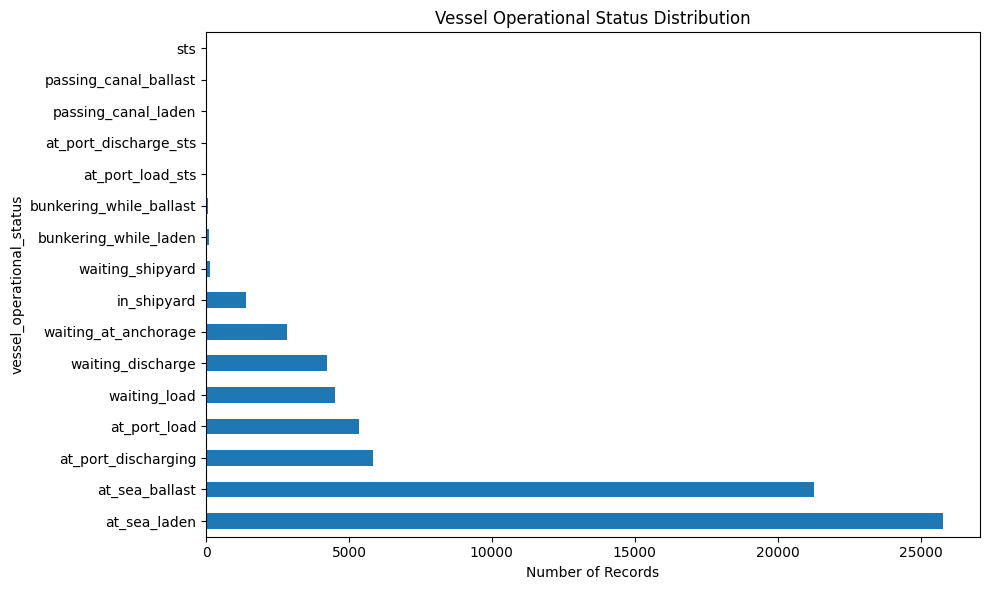

In [321]:
plt.figure(figsize=(10, 6))
positions['vessel_operational_status'].value_counts().plot(kind='barh')
plt.title("Vessel Operational Status Distribution")
plt.xlabel("Number of Records")
plt.tight_layout()
plt.show()

#### The 6 most significant categories are `at_sea_laden` , `at_sea_ballast`, `at_port_discharging`, `at_port_load`, `waiting_load`, `waiting_discharge`

In [322]:
positions[['ais_speed', 'ais_draft']].describe()

,ais_speed,ais_draft
count,71578.000000,71578.000000
mean,6.061723,9.761184
std,6.415371,3.408525
min,0.000000,0.000000
25%,0.000000,7.100000
50%,8.000000,9.200000
75%,11.200000,12.000000
max,102.300000,25.500000


#### The table above shows descriptive statistics for `ais_speed` and `ais_draft`. We observe:
- Average AIS speed is ~6 knots, with a max over 100 (likely an outlier).
- Average draft is ~9.76m, peaking at 25.5m.
- Zero values in speed and draft likely represent stationary or unloaded vessels.

In [323]:
top_statuses = [
    'at_sea_laden',
    'at_sea_ballast',
    'at_port_discharging',
    'at_port_load',
    'waiting_load',
    'waiting_discharge'
]

subset = positions[positions['vessel_operational_status'].isin(top_statuses)]

### vessel_operational_status vs ais_speed

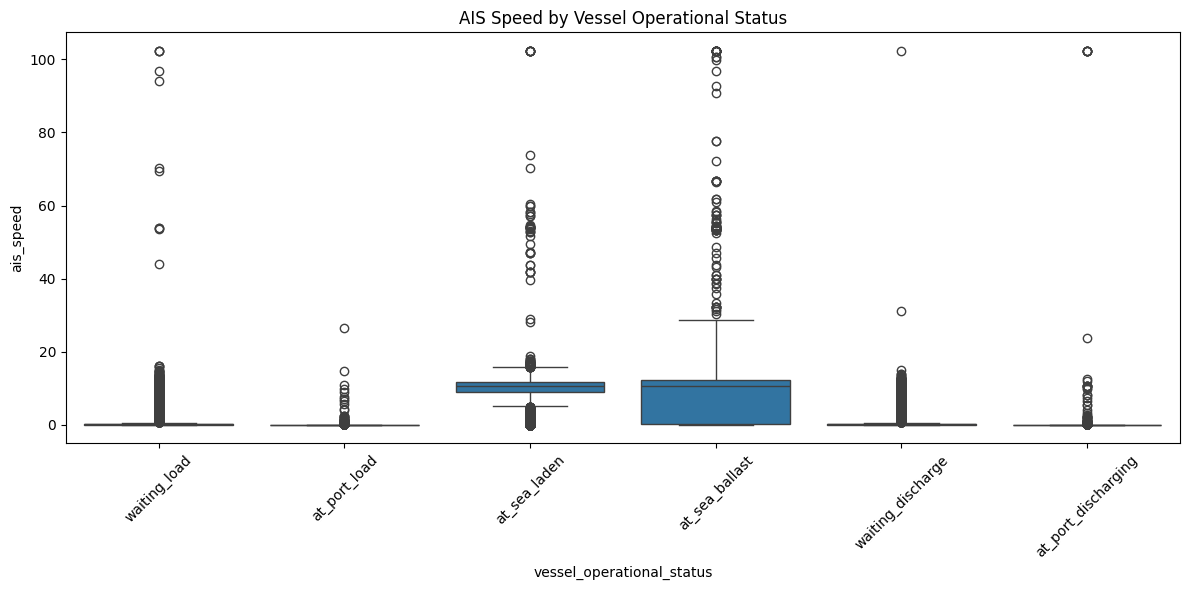

In [324]:
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='vessel_operational_status', y='ais_speed')
plt.title('AIS Speed by Vessel Operational Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`at_sea_ballast` and `at_sea_laden` vessels show the highest speeds. Vessels at port or waiting have speeds close to 0, which confirms their idle state.

### vessel_operational_status vs ais_draft

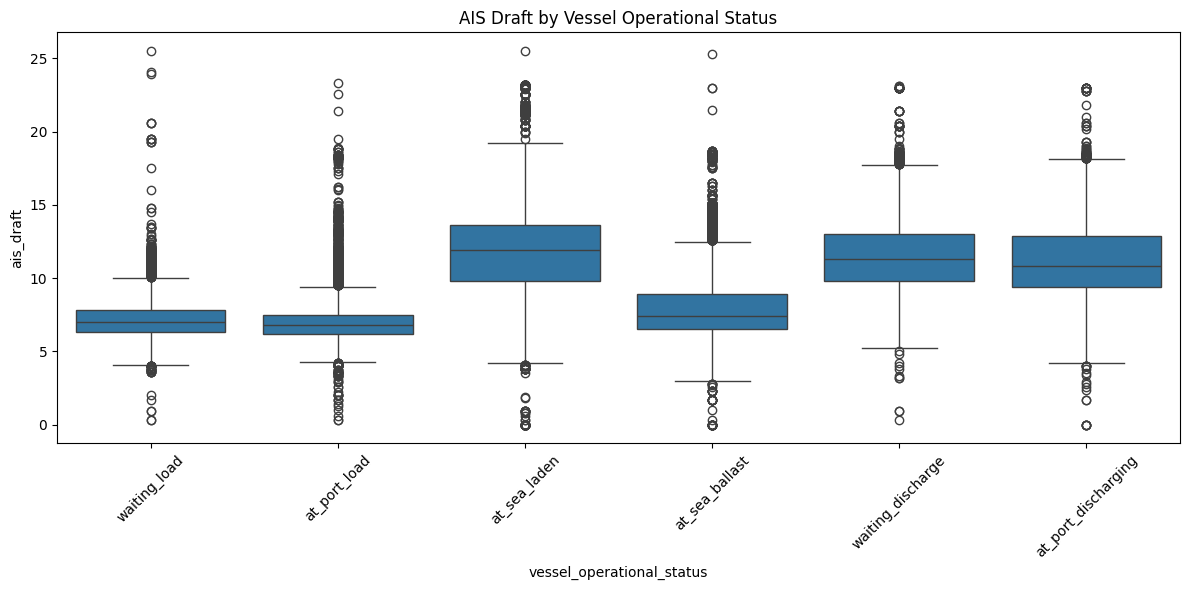

In [325]:
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='vessel_operational_status', y='ais_draft')
plt.title('AIS Draft by Vessel Operational Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`at_sea_laden` and `at_port_discharging` and `waiting_discharge` vessels show **consistently higher AIS draft values**, confirming they are heavily loaded.

`at_sea_ballast` vessels exhibit **notably lower draft values**, which aligns with their empty (ballast) condition.

`at_port_load` and `waiting_load` vessels also tend to have **lower drafts**, indicating that they have not yet taken on full cargo.

### Scatterplot: Speed vs Draft Colored by Status

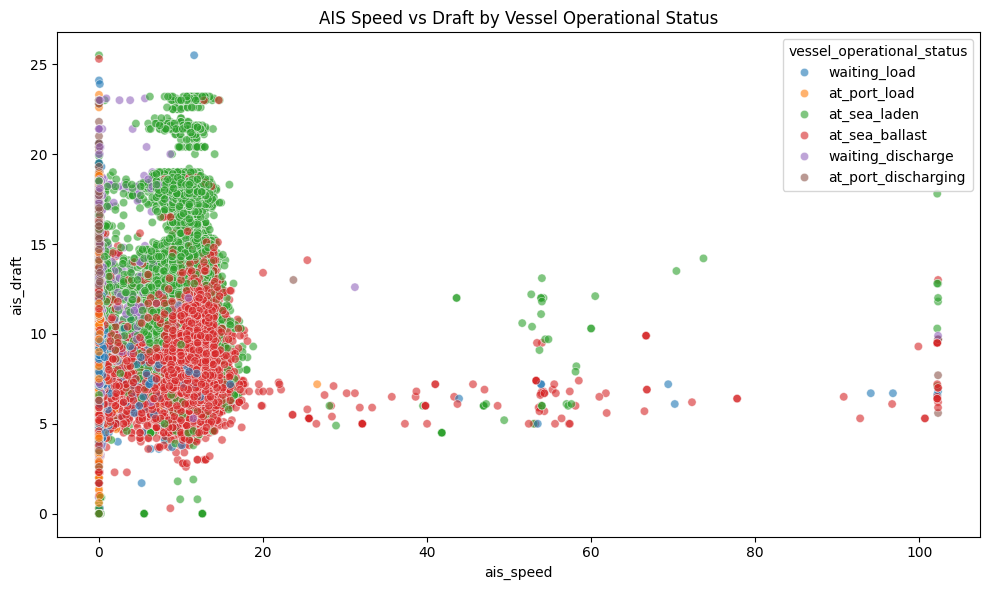

In [326]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=subset,
    x='ais_speed',
    y='ais_draft',
    hue='vessel_operational_status',
    alpha=0.6
)
plt.title("AIS Speed vs Draft by Vessel Operational Status")
plt.tight_layout()
plt.show()

This scatterplot reveals several distinct behavioral clusters:

- **Waiting and Port-based vessels** (e.g., `waiting_load`, `at_port_load`, `waiting_discharge`, `at_port_discharging`) are tightly clustered around **0 AIS speed**, with a wide range of drafts. This confirms their mostly stationary behavior while loading or unloading.

- **At-sea vessels**:
  - `at_sea_laden` (green) vessels show **higher drafts** and are more spread out across a range of low to moderate speeds (5–20 knots), confirming they are loaded and underway.
  - `at_sea_ballast` (red) vessels generally have **lower drafts** and slightly higher speeds, consistent with empty vessels in transit.

- A few extreme outliers exist with speeds above 50 knots — these may be **erroneous AIS reports or sensor glitches**.

Overall, this plot demonstrates the relationship between operational status and a vessel’s physical condition and movement, revealing clear behavior patterns.


### Step 2 Summary: Exploratory Analysis Insights

This exploratory analysis investigated how vessel movement behavior (speed and draft) varies with operational status.

#### Key Insights:

- **Operational Behavior**:
  - `at_sea_laden` vessels operate at moderate speeds with **high drafts**, indicating fully loaded conditions.
  - `at_sea_ballast` vessels exhibit **higher speeds and lower drafts**, confirming empty return voyages.
  - Port-related statuses such as `at_port_load` and `at_port_discharging` show **very low speeds**, with draft levels indicating cargo intake or offloading.
  - `waiting_load` and `waiting_discharge` statuses cluster around **0 speed**, with moderate to high drafts — suggesting vessels are loaded and awaiting terminal access.

- **AIS Speed and Draft Distribution**:
  - The **median AIS speed** is ~8 knots, but many records are at 0, especially for idle vessels.
  - AIS draft ranges widely, with a **median around 9.2 meters** and outliers up to 25m.
  - Some extreme AIS speeds (>50 knots) likely represent **sensor or reporting errors**, which we retain for completeness but highlight as potential outliers.

- **Relationship Between Status, Speed, and Draft**:
  - Clear behavioral clusters emerge from the scatterplot:
    - **Low speed + high draft** → port or waiting, fully loaded
    - **High speed + low draft** → in transit, empty
    - **Medium speed + high draft** → laden vessels at sea

This triad (status, speed, draft) offers a strong behavioral fingerprint that will be useful when classifying vessel types and analyzing cargo patterns in later stages.


# 3.  Add New Dimension

In [327]:
positions['vessel_dwt']

0         11717
1         39815
2         11722
3         13465
4         39415
          ...  
71630    210870
71631    181283
71632    181283
71633    182498
71634    182316
Name: vessel_dwt, Length: 71578, dtype: int64

In [328]:
def classify_vessel(dwt):
    if dwt >= 100000:
        return 'Capsesize'
    elif dwt >= 60000:
        return 'Panamax'
    elif dwt >= 40000:
        return 'Supramax'
    elif dwt >= 10000:
        return 'Handymax'
    else:
        return None

In [329]:
# Apply to vessel_dwt
positions['vessel_class'] = positions['vessel_dwt'].apply(classify_vessel)

### Number of rows per vessel_class

In [330]:
class_counts = positions.groupby('vessel_class').size().sort_values(ascending=False)
class_counts

vessel_class
Handymax     23798
Panamax      23406
Supramax     14247
Capsesize    10123
dtype: int64

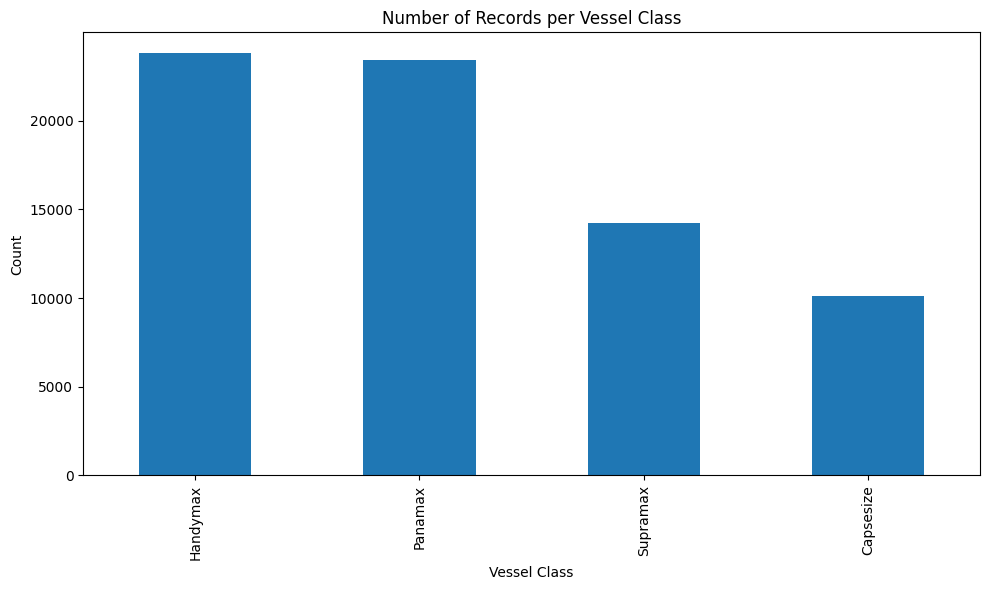

In [331]:
plt.figure(figsize= (10,6))
class_counts.plot(kind='bar')
plt.title("Number of Records per Vessel Class")
plt.xlabel("Vessel Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Unique vessels_class count by unique IMO

In [332]:
class_counts_imo = positions.groupby('vessel_class')['imo'].nunique().sort_values(ascending=False)
class_counts_imo

vessel_class
Handymax     4763
Panamax      4684
Supramax     2850
Capsesize    2025
Name: imo, dtype: int64

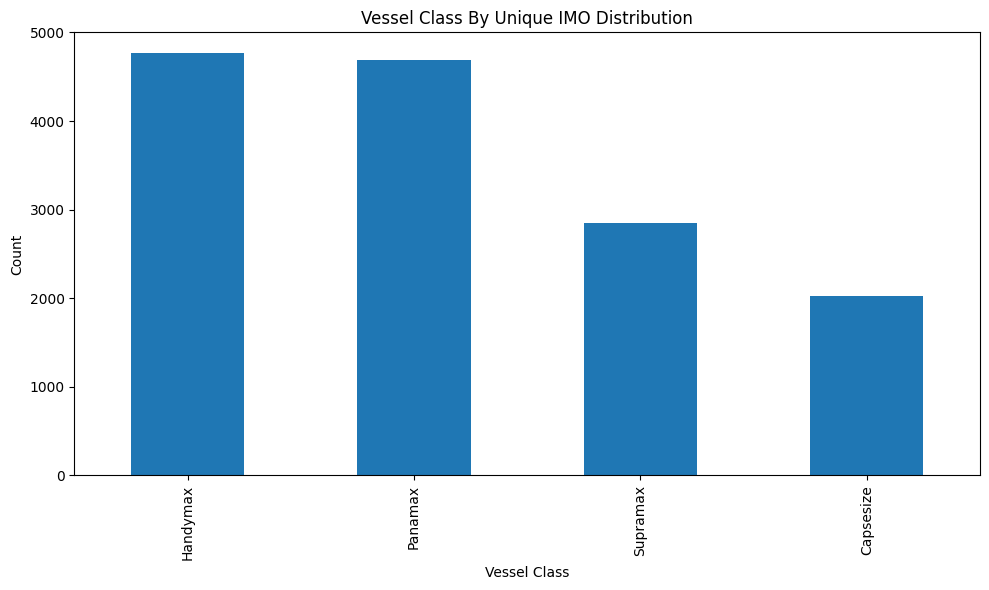

In [333]:
plt.figure(figsize= (10,6))
class_counts_imo.plot(kind='bar')
plt.title("Vessel Class By Unique IMO Distribution")
plt.xlabel("Vessel Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Summary stats per vessel_class

In [334]:
positions.groupby('vessel_class')[['ais_speed', 'ais_draft']].describe()

ais_speed                                                     \
                 count      mean       std  min  25%   50%     75%    max   
vessel_class                                                                
Capsesize      10123.0  7.758086  5.273633  0.0  0.2  10.0  11.600  102.2   
Handymax       23798.0  5.372409  7.066460  0.0  0.0   0.3  11.000  102.3   
Panamax        23406.0  6.424686  5.772553  0.0  0.0   9.1  11.375  102.3   
Supramax       14247.0  5.410781  6.736538  0.0  0.0   0.5  11.000  102.3   

             ais_draft                                                   
                 count       mean       std  min  25%   50%   75%   max  
vessel_class                                                             
Capsesize      10123.0  13.570197  4.348670  0.3  9.4  12.4  18.0  23.3  
Handymax       23798.0   7.684759  1.961109  0.0  6.1   7.6   9.5  25.5  
Panamax        23406.0  10.452555  2.876987  0.0  7.5  10.9  13.1  24.1  
Supramax       14247.0   9.387352  2.544267  0.0  6.8   9.8  11.8  25.3

### Summary of AIS Speed and Draft by Vessel Class

This table provides a descriptive statistical overview of how vessel movement characteristics vary by size class.

#### Key Observations:

- **Capesize vessels**:
  - Exhibit the **highest average draft** (13.57m) and **highest average speed** (7.76 knots), indicating they are typically large, heavily loaded, and in active transit.
  - Their wider range of drafts (up to ~23.0m) suggests significant cargo capacity variations.

- **Panamax vessels**:
  - Show a **moderate draft** (10.45m) and **higher-than-average speed** (6.42 knots), consistent with their usage for long-range shipping routes in canals and constrained channels.

- **Supramax and Handymax vessels**:
  - Both classes exhibit **lower average speeds** (5.37–5.41 knots) and **shallower drafts** (7.68-9.39m), typically involved in more regional or port-focused operations.
  - Handymax vessels also have the **widest variance in draft**, peaking at 25.5m — likely due to specialized loading scenarios or port conditions.

These patterns confirm that vessel size influences not only physical characteristics but also operational behavior on the water.


# 4. Cargo Analysis

In [335]:
positions[['vessel_class','vessel_commodity_group_onboard']].value_counts()

vessel_class  vessel_commodity_group_onboard
Panamax       Coal                              4791
Capsesize     Iron Ore                          3521
Panamax       Grain                             3439
Handymax      Bulk                              2553
Supramax      Bulk                              2323
Panamax       Bulk                              2147
Handymax      Steels                            1933
Supramax      Coal                              1904
Handymax      Grain                             1794
              Breakbulk                         1548
              Fertilizers                       1312
Capsesize     Coal                              1046
Supramax      Steels                            1037
Handymax      Agriprods                          940
Panamax       Agriprods                          887
Handymax      Coal                               873
Supramax      Grain                              873
              Breakbulk                          872
P

## Basic Crosstab

In [336]:
pd.crosstab(positions['vessel_class'], positions['vessel_commodity_group_onboard'])

vessel_commodity_group_onboard,Agriprods,Breakbulk,Breakbulk/Bulk,Breakbulk/Steels,Bulk,Bulk/Iron Ore,Bulk/Iron Products,Bulk/Steels,Coal,Coal/Iron Ore,Coal/Steels,Fertilizers,Grain,Iron Ore,Iron Products,Iron Products/Steels,Pellets Group,Project Cargoes,Steels
vessel_class,,,,,,,,,,,,,,,,,,,
Capsesize,5,5,0,0,644,0,0,0,1046,14,0,5,0,3521,0,0,0,0,0
Handymax,940,1548,1,7,2553,5,4,14,873,0,0,1312,1794,210,56,0,128,197,1933
Panamax,887,501,0,0,2147,0,0,0,4791,5,0,841,3439,622,37,0,18,14,643
Supramax,444,872,5,0,2323,1,0,0,1904,0,2,547,873,263,59,9,22,36,1037


## Check how many records exist for each unique combination of `vessel_class` and `vessel_commodity_group_onboard`

In [337]:
cargo_counts = positions.groupby(['vessel_class', 'vessel_commodity_group_onboard'])['imo'].nunique().unstack().fillna(0)
cargo_counts

vessel_commodity_group_onboard,Agriprods,Breakbulk,Breakbulk/Bulk,Breakbulk/Steels,Bulk,Bulk/Iron Ore,Bulk/Iron Products,Bulk/Steels,Coal,Coal/Iron Ore,Coal/Steels,Fertilizers,Grain,Iron Ore,Iron Products,Iron Products/Steels,Pellets Group,Project Cargoes,Steels
vessel_class,,,,,,,,,,,,,,,,,,,
Capsesize,1.0,1.0,0.0,0.0,142.0,0.0,0.0,0.0,230.0,3.0,0.0,1.0,0.0,797.0,0.0,0.0,0.0,0.0,0.0
Handymax,216.0,374.0,1.0,2.0,607.0,1.0,1.0,4.0,239.0,0.0,0.0,307.0,414.0,60.0,14.0,0.0,28.0,46.0,451.0
Panamax,197.0,109.0,0.0,0.0,493.0,0.0,0.0,0.0,1128.0,1.0,0.0,186.0,754.0,157.0,8.0,0.0,5.0,3.0,139.0
Supramax,97.0,193.0,1.0,0.0,543.0,1.0,0.0,0.0,483.0,0.0,1.0,124.0,198.0,63.0,16.0,2.0,5.0,9.0,227.0


## Stacked Bar Chart of Commodities per Vessel Class 

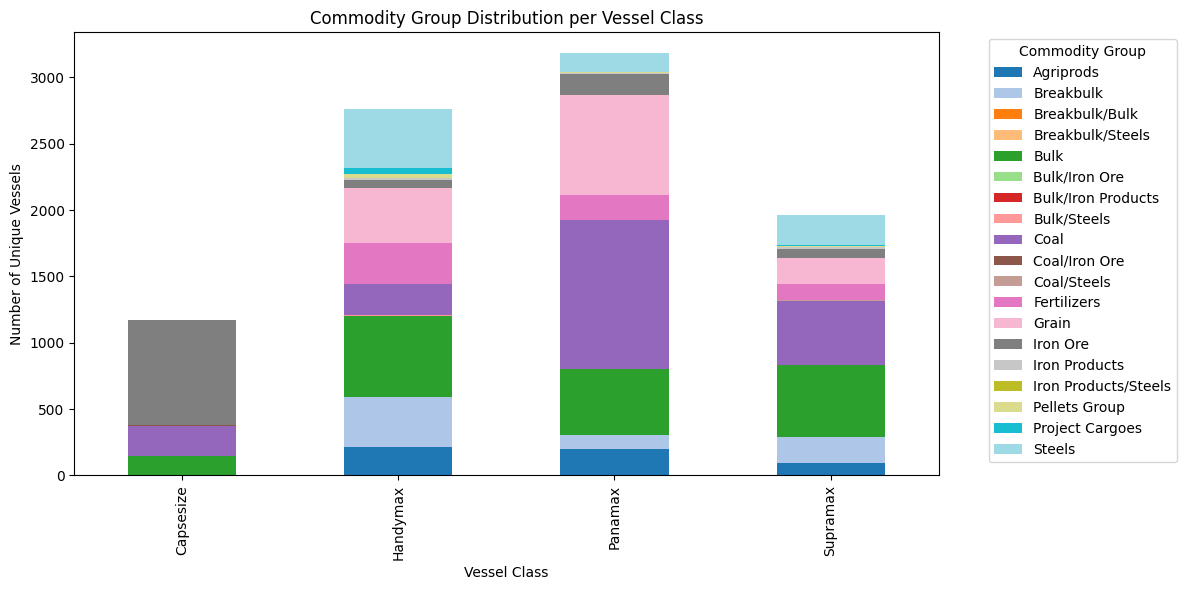

In [338]:
cargo_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Commodity Group Distribution per Vessel Class")
plt.ylabel("Number of Unique Vessels")
plt.xlabel("Vessel Class")
plt.legend(title="Commodity Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 4: Cargo Analysis by Vessel Class

We examined how different vessel classes relate to the types of commodities carried, using the `vessel_commodity_group_onboard` attribute.

#### Key Observations from the Chart:

- **Capesize vessels** carry a **narrow range of commodities**, with a heavy concentration in **Iron Ore**. This aligns with their role in transporting massive, dense bulk cargo over long distances.

- **Panamax vessels** exhibit a **more diverse commodity profile**, but still show strong representation in traditional bulk commodities like **Coal**, **Fertilizers**, **Grain** and **Iron Ore**. Their size allows them to pass through size-constrained routes like the Panama Canal while handling significant cargo.

- **Handymax and Supramax vessels** have the **widest variety of commodity groups**, including:
  - **Agricultural products (AgriProds)**
  - **Breakbulk and project cargo**
  - **Bulk/Steels, Fertilizers, and Grain**

  This diversity reflects their flexibility and common use in regional or multi-port trades.

#### Interpretation:

- There is a **clear link between vessel class and commodity specialization**:
  - Larger vessels are used for fewer, denser commodities
  - Smaller vessels serve broader, often mixed logistics needs

- **Operational strategy and trade routes** likely influence these patterns, where vessel class determines not just capacity, but the range of viable cargoes and ports served.


# 5. Geographical Analysis

In [339]:
positions['zone_name'].value_counts()

zone_name
Far East                             17204
South East Asia                      12361
East Coast South America              3775
Indian Ocean                          2765
Arabian Gulf                          2456
South Atlantic                        2354
East Mediterranean                    2180
East Coast India                      1888
South Africa                          1817
North West Africa                     1741
Black Sea                             1709
West Mediterranean                    1562
East Africa                           1456
East Aussie                           1454
NoPac                                 1424
Antwerp Rotterdam Amsterdam Ghent     1163
Red Sea                               1069
South West Africa                     1006
West Aussie                            959
West Coast India                       902
USG                                    882
West Coast Central America             857
West Coast South America               847
B

### Get the unique vessels located in Southeast Asian countries

In [340]:
SEA_vessels = positions[positions['zone_name'] == 'South East Asia']
unique_imos = SEA_vessels['imo'].unique()
print(f"Total unique vessels in South East Asia: {len(unique_imos)}")

Total unique vessels in South East Asia: 3094


## Plotting the Polygon

### Polygon and Mapping

In [341]:
# Define polygon boundary (approx.)
se_asia_poly = Polygon([
    (90, -11),    # SW of Sumatra
    (115, -11),   # South of Java
    (135, -5),    # East of Papua
    (140, 25),    # North of Philippines
    (100, 25),    # Vietnam/Gulf of Thailand
    (90, -11)     # Close polygon
])

# Convert each row into a Point
positions['point'] = positions.apply(lambda row: Point(row['ais_long'], row['ais_lat']), axis=1)

'''
Since this is a time-series data, the same vessel can appear in the same location at multiple timestamps
For clarity, I will plot one point per vessel by filtering on its most recently tracked position
'''

# Latest position for each vessel
positions_latest = positions.sort_values('status_date_time').groupby('imo').tail(1)

# Filter points inside polygon
in_polygon = positions_latest[positions_latest['point'].apply(se_asia_poly.contains)]

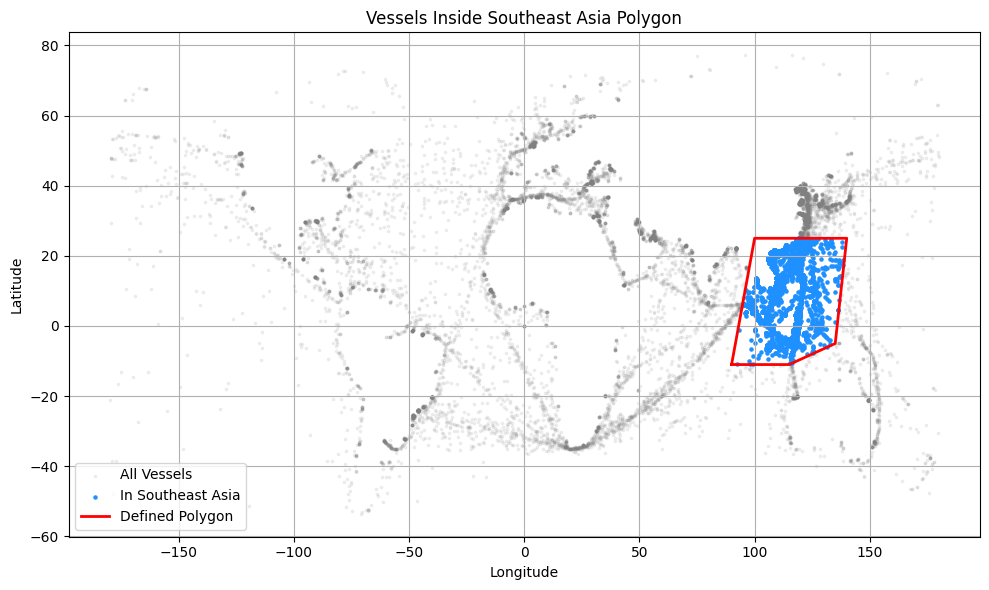

In [342]:
# plot map
plt.figure(figsize=(10,6))
plt.scatter(positions_latest['ais_long'], positions_latest['ais_lat'], s=3, alpha=0.1, color='gray', label='All Vessels')
plt.scatter(in_polygon['ais_long'], in_polygon['ais_lat'], s=5, color='dodgerblue', label='In Southeast Asia')
x, y = se_asia_poly.exterior.xy
plt.plot(x, y, color='red', linewidth=2, label='Defined Polygon')
plt.title("Vessels Inside Southeast Asia Polygon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Unique Vessels in the Polygon

In [343]:
vessels_in_polygon = in_polygon['imo'].unique()
print(f"Total unique vessels inside the polygon: {len(vessels_in_polygon)}")

Total unique vessels inside the polygon: 2759


In [344]:
vessels_df = pd.DataFrame(vessels_in_polygon, columns=['imo'])
vessels_df.head()

,imo
0,9286932
1,9287182
2,9288435
3,9288514
4,9286906


#### The dataframe above has the IDs (IMOs) of the unique vessels that fall into the Southeast Asian polygon 

# 6. Putting it All Together

## Filter dataset for vessels that loaded cargo in SEA between 20/08/2024 and 24/08/2024

In [345]:
positions['vessel_operational_status'].value_counts()

vessel_operational_status
at_sea_laden               25791
at_sea_ballast             21266
at_port_discharging         5830
at_port_load                5341
waiting_load                4503
waiting_discharge           4222
waiting_at_anchorage        2824
in_shipyard                 1393
waiting_shipyard             154
bunkering_while_laden         95
bunkering_while_ballast       73
at_port_load_sts              33
at_port_discharge_sts         18
passing_canal_laden           13
passing_canal_ballast         13
sts                            9
Name: count, dtype: int64

In [346]:
positions[['zone_name', 'status_date_time', 'vessel_operational_status']]

,zone_name,status_date_time,vessel_operational_status
0,Far East,2024-08-20,waiting_load
1,East Aussie,2024-08-20,at_port_load
2,Far East,2024-08-20,waiting_load
3,South East Asia,2024-08-20,at_sea_laden
4,South East Asia,2024-08-20,at_sea_laden
...,...,...,...
71630,Far East,2024-08-24,at_port_discharging
71631,South Africa,2024-08-24,at_sea_laden
71632,South East Asia,2024-08-24,at_sea_laden
71633,East Aussie,2024-08-24,at_port_load


In [347]:
loading_status = ['at_port_load', 'at_port_load_sts']
start_date = '2024-08-20'
end_date = '2024-08-24'
load_loc = 'South East Asia'

#filter
sea_loaded_positions = positions[
    (positions['zone_name'] == load_loc) &
    (positions['status_date_time'] >= start_date) &
    (positions['status_date_time'] <= end_date) & 
    (positions['vessel_operational_status'].isin(loading_status))
    ]

## Cargo loaded onto those vessels

In [348]:
cargo_counts = sea_loaded_positions['vessel_commodity_group_onboard'].value_counts(dropna=False)
cargo_df = cargo_counts.reset_index()
cargo_df.columns = ['Commodity Group', 'Number of Vessels']
cargo_df

,Commodity Group,Number of Vessels
0,Coal,926
1,Bulk,356
2,Breakbulk,155
3,NaN,97
4,Agriprods,51
5,Steels,34
6,Fertilizers,27
7,Iron Ore,8
8,Pellets Group,4
9,Bulk/Iron Products,4


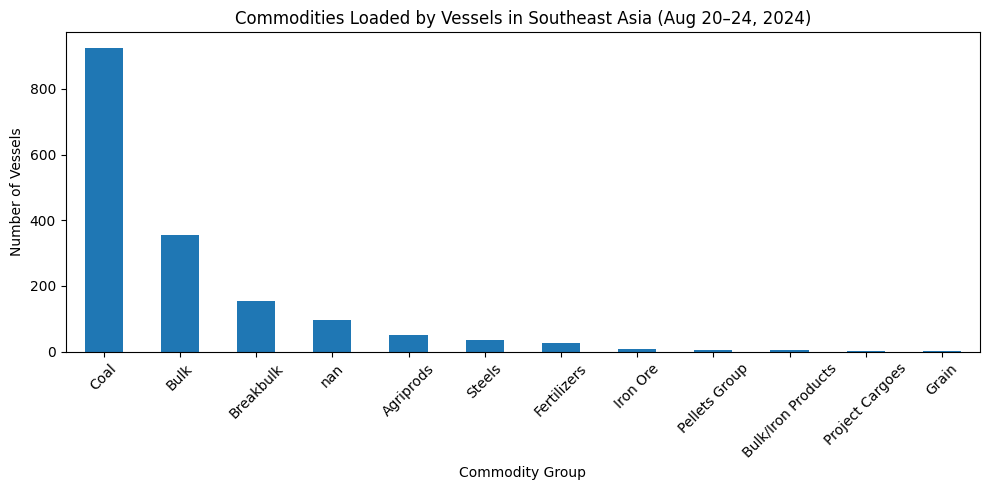

In [349]:
# Visualization 
plt.figure(figsize = (10,5))
cargo_counts.plot(kind="bar")
plt.title('Commodities Loaded by Vessels in Southeast Asia (Aug 20–24, 2024)')
plt.xlabel('Commodity Group')
plt.ylabel('Number of Vessels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The three most common cargos on vessels in Southeast Asia are Coal, Bulk, and Breakbulk

## Top 2 exports for each country in southeast asia

In [350]:
sea_loaded_positions.columns

Index(['index', 'imo', 'vessel_dwt', 'status_date_time', 'in_blackout',
       'ais_speed', 'ais_draft', 'vessel_speed_ratio', 'ais_lat', 'ais_long',
       'vessel_draft_status', 'zone_id', 'zone_name', 'zone_entry_time',
       'zone_out_time', 'updated_at', 'ais_heading', 'ais_eta',
       'ais_destination_raw', 'ais_destination_normalized', 'origin_port_id',
       'origin_port_name', 'origin_country_id', 'origin_country_name',
       'origin_zone_id', 'origin_zone_name', 'real_destination_port_id',
       'real_destination_port_name', 'real_destination_country_id',
       'real_destination_country_name', 'real_destination_zone_id',
       'real_destination_zone_name', 'vessel_operational_status',
       'vessel_commodity_onboard', 'vessel_commodity_group_onboard',
       'voyage_intake_mt', 'last_seen', 'during_cabotage_voyage',
       'vessel_operational_status_group', 'vessel_class', 'point'],
      dtype='object')

In [351]:
country_commodity_counts = sea_loaded_positions.groupby(
    ['origin_country_name','vessel_commodity_group_onboard']
    ).size().reset_index(name='count')

country_commodity_counts

,origin_country_name,vessel_commodity_group_onboard,count
0,Brunei Darussalam,Fertilizers,1
1,China,Fertilizers,5
2,China,Steels,1
3,Indonesia,Agriprods,13
4,Indonesia,Breakbulk,38
5,Indonesia,Bulk,72
6,Indonesia,Bulk/Iron Products,4
7,Indonesia,Coal,919
8,Indonesia,Fertilizers,10
9,Indonesia,Steels,1


In [352]:
top_exports = country_commodity_counts.sort_values(['origin_country_name', 'count']
                                     , ascending=(True, False)
                                    ).groupby('origin_country_name').head(2)

In [353]:
top_exports

,origin_country_name,vessel_commodity_group_onboard,count
0,Brunei Darussalam,Fertilizers,1
1,China,Fertilizers,5
2,China,Steels,1
7,Indonesia,Coal,919
5,Indonesia,Bulk,72
10,Korea South,Steels,1
13,Malaysia,Bulk,20
11,Malaysia,Agriprods,8
17,Papua New Guinea,Breakbulk,9
18,Papua New Guinea,Bulk,3


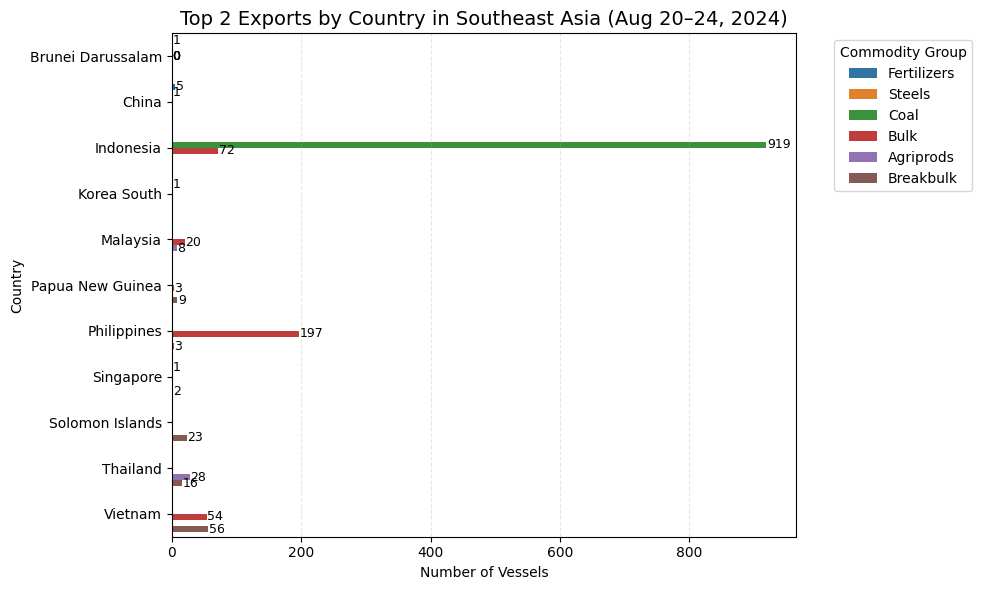

In [354]:
# Visualize
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_exports,
    x='count',
    y='origin_country_name',
    hue='vessel_commodity_group_onboard'
)
# Get the current Axes object
ax = plt.gca()

# Loop through each bar (patch) and annotate it
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(
        width + 1,  # Shift slightly to the right of the bar
        y,
        int(width),  # Show count
        va='center',
        fontsize=9
    )
    
plt.title('Top 2 Exports by Country in Southeast Asia (Aug 20–24, 2024)', fontsize=14)
plt.xlabel('Number of Vessels')
plt.ylabel('Country')
plt.legend(title='Commodity Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


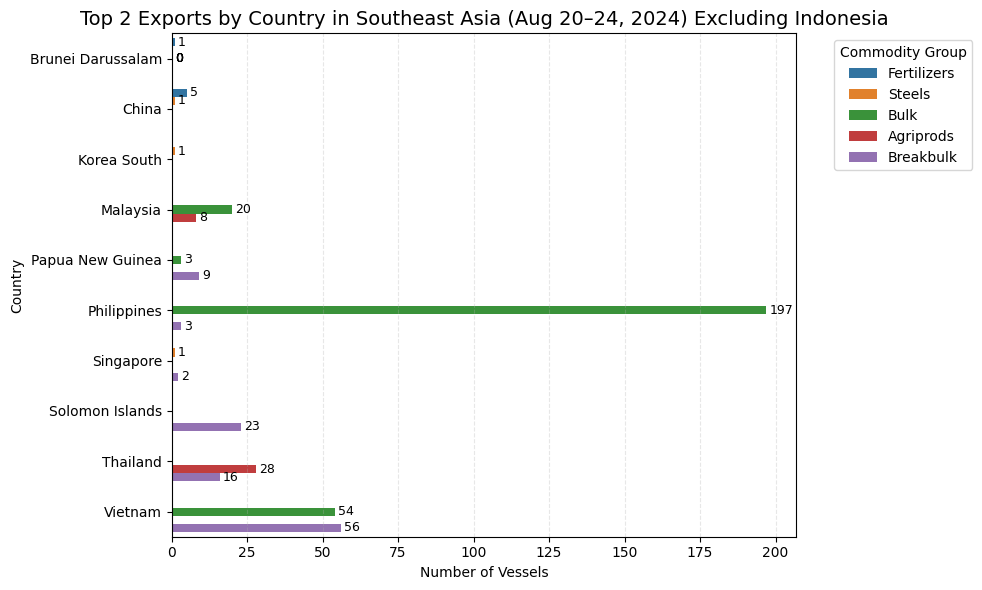

In [355]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_exports[top_exports['origin_country_name']!= 'Indonesia'],
    y='origin_country_name',
    x='count',
    hue='vessel_commodity_group_onboard'
)

# Get the current Axes object
ax = plt.gca()

# Loop through each bar (patch) and annotate it
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(
        width + 1,  # Shift slightly to the right of the bar
        y,
        int(width),  # Show count
        va='center',
        fontsize=9
    )
    
plt.title('Top 2 Exports by Country in Southeast Asia (Aug 20–24, 2024) Excluding Indonesia', fontsize=14)
plt.xlabel('Number of Vessels')
plt.ylabel('Country')
plt.legend(title='Commodity Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


### Export Insights from Southeast Asia (Aug 20-24, 2024)

#### Key Observations

- **🇮🇩 Indonesia dominates** vessel-based exports, accounting for the vast majority of coal shipments (**919 vessels**). This makes **coal** the most exported commodity in the region during this period.

- **🇵🇭 Philippines** ranks second, primarily exporting **Bulk** commodities (**197 vessels**), likely indicating trade in raw materials such as minerals or grains.

- **🇻🇳 Vietnam** shows a **balanced export profile**, with nearly equal counts of **Breakbulk** (**56 vessels**) and **Bulk** (**54 vessels**), suggesting a combination of manufactured and raw goods being shipped.

- **🇹🇭 Thailand** and **🇲🇾 Malaysia** contribute smaller but diverse exports:
  - Thailand: Strong in **Agriprod** (**28 vessels**) and **Breakbulk** (**16 vessels**)
  - Malaysia: Exports a mix of **Bulk** and **Agriprod** cargo

- **Smaller nations** such as **Brunei**, **Singapore**, **Solomon Islands**, and **Papua New Guinea** have limited but varied export activity. Commodities include **Breakbulk**, **Fertilizers**, and **Agriprod**, likely tied to niche products or regional redistribution.

---

### Contextual Insight

Excluding Indonesia from the analysis reveals more granular dynamics across the region — highlighting **Philippines**, **Vietnam**, and **Thailand** as key contributors to Southeast Asia’s **bulk and breakbulk logistics**, likely supported by robust port infrastructure and regional trade agreements.


## Most active operators in the region 

In [356]:
# unique loaded vessels in southeast asia
active_imos = sea_loaded_positions['imo'].unique()

In [357]:
active_vessel_info = characteristics[characteristics['imo'].isin(active_imos)]
active_vessel_info.head()

,id,imo,name,type,subtype,ship_status,registered_owner,ship_owner,tc_operator,beneficial_owner,...,me_rpm,ae_number,last_ss_date,next_ss_date,class_society,cranes_type,cranes_number,cranes_swl,cranes_outreach,private_comments
395,100948,9308869,COHIBA I,Bulk carrier,Bulk Carrier,DELIVERED,OCEANFIRE OWNERS INC,TMS DRY,TMS DRY,ECONOMOU GROUP,...,0,0,2024-06-25,2029-06-24,BV,NaN,0,0.0,0,0
397,100963,9309019,NBA PEACE,Bulk carrier,Bulk Carrier,DELIVERED,MARITIME NBA PEACE LLC,HERMES MARITIME SERVICES,HERMES MARITIME SERVICES,HERMES MARITIME SERVICES,...,0,0,2022-06-26,2027-04-06,CC,NaN,0,0.0,0,0
442,103100,9330824,XH NAVIGATOR,Bulk carrier,Bulk Carrier,DELIVERED,XIE HAI NAVIGATOR SHIPPING CO,ZHOUSHAN XIEHAI SHIPPING,XIEHAI BULK SHIPPING,ZHOUSHAN XIEHAI SHIPPING,...,0,0,2020-08-14,2025-11-02,LR,NaN,0,0.0,0,0
501,106223,9363039,SIVOTA,Bulk carrier,Bulk Carrier,DELIVERED,ELVA SHIPPING INC,TMS DRY,TMS DRY,ECONOMOU GROUP,...,0,0,2023-08-13,2028-06-26,BV,NaN,0,0.0,0,0
548,110201,9403528,TRUE CHAMPION,Bulk carrier,Bulk Carrier,DELIVERED,POLAR 1 LTD,JP MORGAN GLOBAL MARITIME,JP MORGAN GLOBAL MARITIME,JP MORGAN,...,0,0,2021-12-15,2026-08-02,BV,NaN,0,0.0,0,0


In [358]:
top_operators = active_vessel_info['tc_operator'].value_counts().head(10)
top_operators

tc_operator
GURITA LINTAS SAMUDERA        15
LUMOSO PRATAMA LINE           10
OLDENDORFF CARRIERS            7
MANA LAGI PELAYARAN            6
SHENZHEN OCEAN SHIPPING        6
DONGGUAN HAICHANG SHIPPING     5
MUR SHIPPING                   4
DIA YUAN INTERNATIONAL         4
GUANGDONG YUDEAN SHIPPING      4
BRAVE ROYAL SHIPPING           4
Name: count, dtype: int64

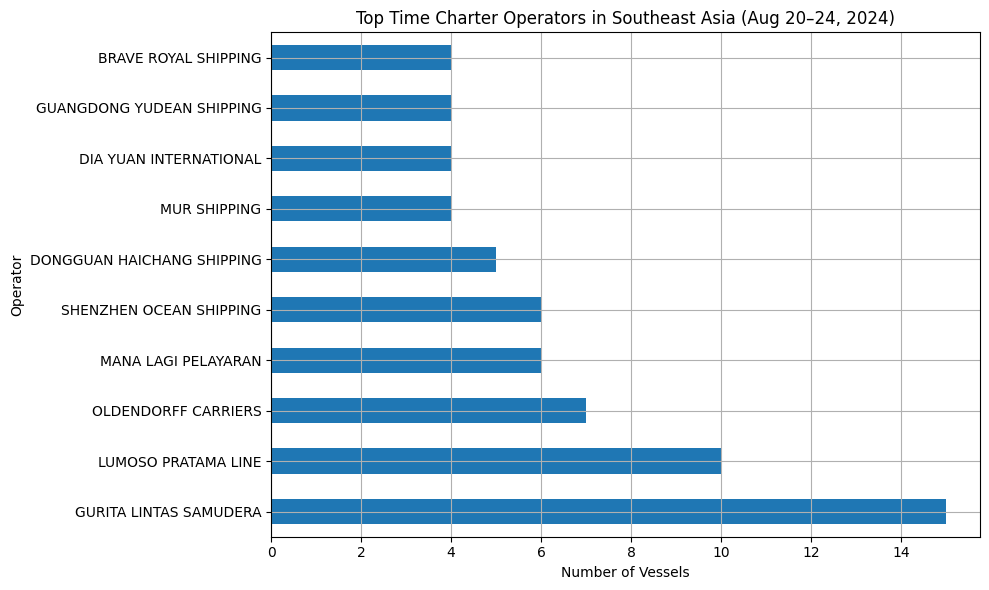

In [359]:
top_operators.plot(kind='barh', figsize=(10, 6), title='Top Time Charter Operators in Southeast Asia (Aug 20–24, 2024)')
plt.xlabel("Number of Vessels")
plt.ylabel("Operator")
plt.grid(True)
plt.tight_layout()
plt.show()

#### These operators likely represent key logistics providers in the bulk and commodity trades in the region, particularly for coal and breakbulk shipments.

## Draft Analysis

In [360]:
# get both ais_draft and draft in one dataframe
merged_df = pd.merge(sea_loaded_positions, characteristics, on='imo', how='inner')

In [361]:
# filter valid entries
merged_valid = merged_df[(merged_df['ais_draft'].notna()) &
                         (merged_df['draft'].notna()) &
                         (merged_df['ais_draft'] > 0) &
                         (merged_df['draft'] > 0)].copy()


In [362]:
merged_valid[['draft', 'ais_draft']]

,draft,ais_draft
0,10.340,6.8
1,7.980,4.5
2,10.414,5.6
3,10.700,5.9
4,9.524,6.0
...,...,...
1488,18.120,10.6
1489,13.465,6.9
1490,13.460,13.7
1491,18.220,14.0


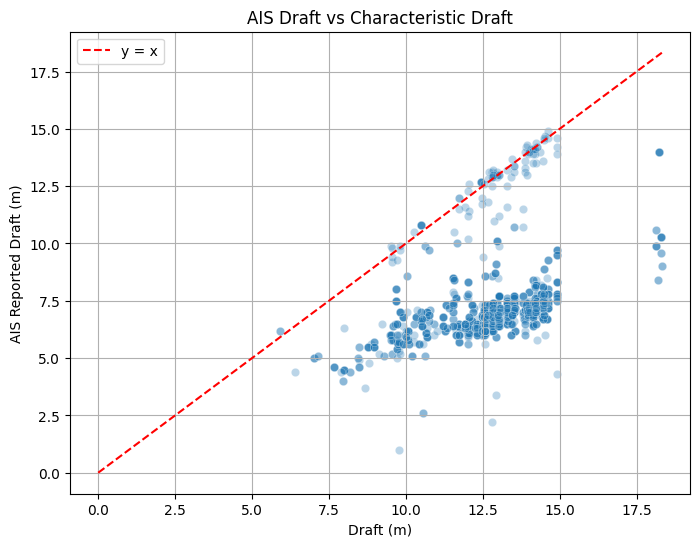

In [363]:
#Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_valid, x='draft', y='ais_draft', alpha=0.3)
plt.plot([0, merged_valid[['draft', 'ais_draft']].max().max()],
         [0, merged_valid[['draft', 'ais_draft']].max().max()],
         color='red', linestyle='--', label='y = x')
plt.title("AIS Draft vs Characteristic Draft")
plt.xlabel("Draft (m)")
plt.ylabel("AIS Reported Draft (m)")
plt.legend()
plt.grid(True)
plt.show()

#### The plot above shows that `draft` is generally always larger than `ais_draft`
It makes sense to believe that a heavier load would result in a deeper draft <br>
Combined with the plot, this shows that 'draft' is the maximum 'draft' possible when a vessel is fully loaded <br>
ais_draft would then be the reported draft based on how much the actual load is

In [364]:
# compute a ratio for ais_draft/draft to have a measure on how loaded a vessel is
# a ratio closer to 1 indicates fully loaded
merged_valid['draft_ratio'] = merged_valid['ais_draft'] / merged_valid['draft']

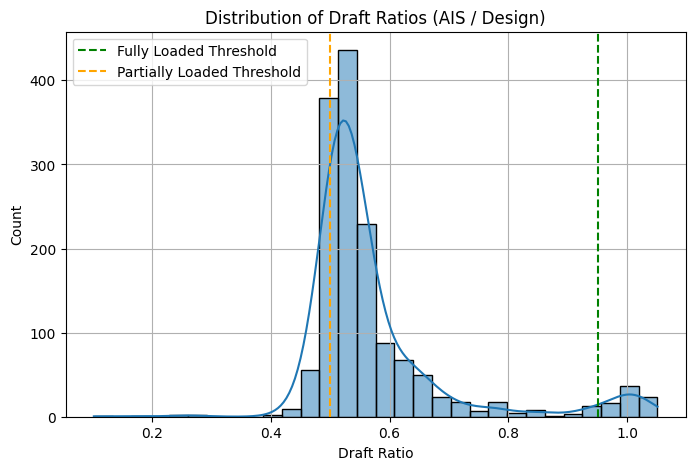

In [365]:
FULLY_LOADED_THRESHOLD = 0.95
PARTIALLY_LOADED_THRESHOLD = 0.5

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(merged_valid['draft_ratio'], bins=30, kde=True)
plt.axvline(FULLY_LOADED_THRESHOLD, color='green', linestyle='--', label='Fully Loaded Threshold')
plt.axvline(PARTIALLY_LOADED_THRESHOLD, color='orange', linestyle='--', label='Partially Loaded Threshold')
plt.title("Distribution of Draft Ratios (AIS / Design)")
plt.xlabel("Draft Ratio")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

#### Histogram Insights

Most vessels exhibit a draft ratio between 0.45 and 0.6, indicating partial loading.

A small but clear segment has ratios above 0.95, which strongly suggests fully loaded conditions.

Very low ratios (below 0.4) likely represent empty or ballast voyages.

Vessels increase their vertical draft as they load more cargo, which aligns with the observed distribution.

This method allows us to infer cargo load status using only AIS and design data—helpful in situations where cargo records are missing or incomplete.

In [366]:
# Load Status Classification
def classify_load_status(ratio):
    if ratio >= FULLY_LOADED_THRESHOLD:
        return "Fully Loaded"
    elif ratio >= PARTIALLY_LOADED_THRESHOLD:
        return "Partially Loaded"
    else:
        return "Likely Empty"

In [368]:
merged_valid['loading_status'] = merged_valid['draft_ratio'].apply(classify_load_status)

# Optional: Preview
merged_valid[['imo', 'ais_draft', 'draft', 'draft_ratio', 'loading_status']].head()

,imo,ais_draft,draft,draft_ratio,loading_status
0,1014931,6.8,10.340,0.657640,Partially Loaded
1,7810753,4.5,7.980,0.563910,Partially Loaded
2,8672055,5.6,10.414,0.537738,Partially Loaded
3,8701519,5.9,10.700,0.551402,Partially Loaded
4,9052329,6.0,9.524,0.629987,Partially Loaded


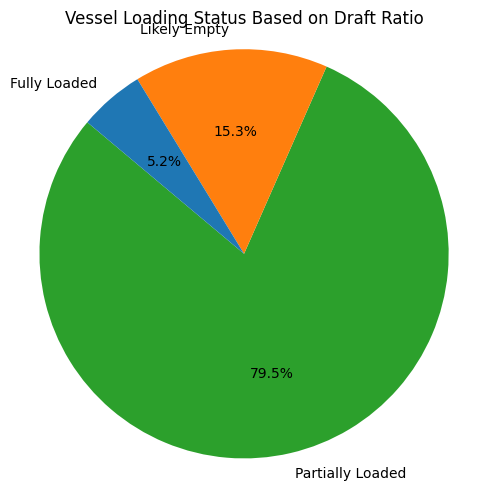

,Loading Status,Number of Vessels
0,Partially Loaded,1187
1,Likely Empty,229
2,Fully Loaded,77


In [369]:
#Visualization
loading_counts = merged_valid['loading_status'].value_counts()

#pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    loading_counts, 
    labels=loading_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728']
)
plt.title("Vessel Loading Status Based on Draft Ratio")
plt.axis('equal')
plt.tight_layout()
plt.show()

#summary as a DataFrame
summary_df = loading_counts.reset_index()
summary_df.columns = ['Loading Status', 'Number of Vessels']
display(summary_df)

### Draft-Based Cargo Loading Insights

- **Draft Ratio Distribution**: Most vessels operate at under 50% of their design draft, suggesting light loading or ballast conditions.
- **Loading Classification**:
  - **Fully Loaded** (≥ 95% design draft): Indicates vessels likely at capacity.
  - **Partially Loaded** (50–95%): Represents moderate loading levels.
  - **Lightly Loaded** (< 50%): Likely empty or in ballast transit.
- **Observation**:
  - Very few vessels are fully loaded, even during active loading periods.
  - This may reflect loading in phases, shorter regional trips, or draft-limited port infrastructure.

### Bonus Insight:
Using this draft ratio classification, operational analysts can flag underutilized trips, verify cargo capacity, or even correlate draft levels with commodity group trends.


## Extra: Destination Analysis

In [372]:
dest_counts = (
    merged_valid['real_destination_country_name']
    .value_counts(dropna=True)
    .reset_index()
)
dest_counts.columns = ['Destination Country', 'Number of Vessels']
display(dest_counts.head(10))

,Destination Country,Number of Vessels
0,China,557
1,Indonesia,242
2,India,179
3,Malaysia,64
4,Japan,64
5,Philippines,53
6,Vietnam,46
7,Bangladesh,37
8,Thailand,35
9,"Taiwan, Province of China",31


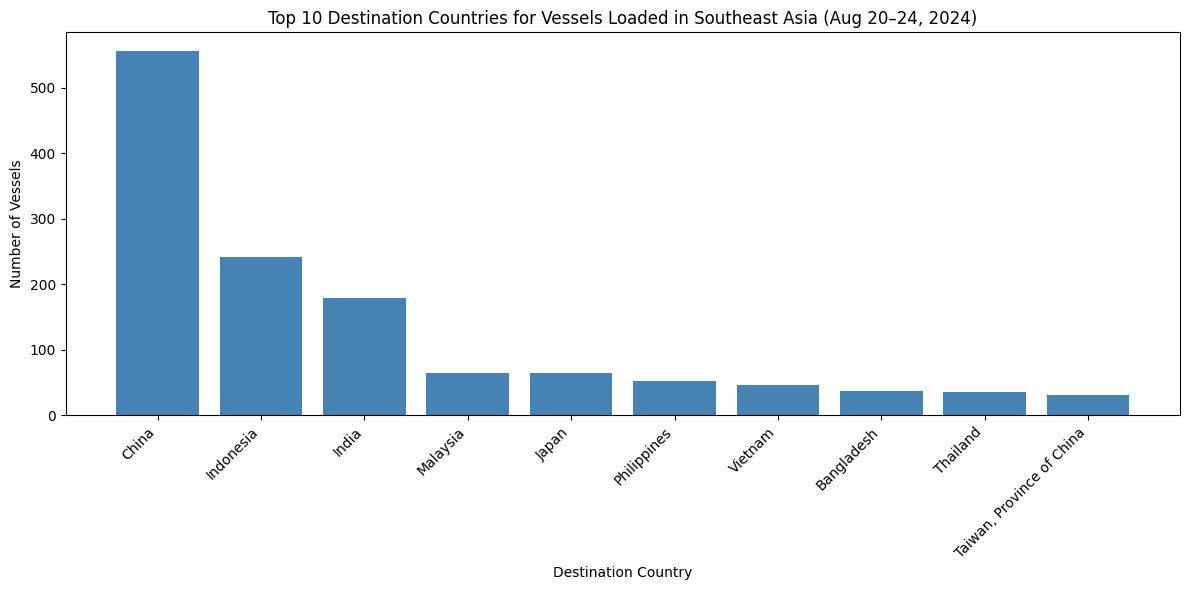

In [373]:
#Visualize
plt.figure(figsize=(12, 6))
plt.bar(dest_counts['Destination Country'][:10], dest_counts['Number of Vessels'][:10], color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Destination Countries for Vessels Loaded in Southeast Asia (Aug 20–24, 2024)')
plt.ylabel('Number of Vessels')
plt.xlabel('Destination Country')
plt.tight_layout()
plt.show()

### Destination Analysis

From the vessels that loaded cargo in Southeast Asia between August 20 and 24, 2024, we observe the following:

- The most common destinations include:
  1. China
  2. Indonesia
  3. India
- These likely reflect regional commodity trading flows (e.g., coal, iron ore, and bulk grains).

#### Observations:
- A large share of voyages are intra-Asian, reinforcing Southeast Asia’s strategic role in short-sea shipping.

> This breakdown helps identify key export corridors and potential bottlenecks.
